# 4 Permutations and Combinations

## 4.1 Permutations

We find the number of $k$-permutations of $A$, first by determining the set of permutations and then by calculating $\frac{|A|!}{(|A|-k)!}$. We will generate the possible permutation sets in two ways, by using the built-in functions in python and also the  **itertools** library that contains several combinatorial functions generating Cartesian products, permutations, and combinations. Please note that in the homework for this topic we ask you to recreate similar functions without using itertools.
We first consider the special case of $k=|A|$, which is equivalent to finding the number of ways of ordering the elements of $A$. 

In [1]:
import itertools

The following function generates the list of permutations for a given set. 

In [2]:
def permute(A):
    if len(A)==1:
        return [tuple(A)]
    permutations = []
    for x in A:
        for y in permute(A-{x}):
            permutations.append((x,)+y)
    return permutations

In [3]:
A = {1, 2, 3}

In [5]:
# Using custom function
permute_all = set(permute(A))
print("Permutations of {}: {}".format(A,permute_all))
print("Number of permutations: ", len(permute_all))

Permutations of {1, 2, 3}: {(1, 3, 2), (1, 2, 3), (2, 1, 3), (3, 2, 1), (3, 1, 2), (2, 3, 1)}
Number of permutations:  6


We repeat the same operation but now using `itertools.permutations` function.

In [6]:
# Find all permutations of A and |A!|
permute_all = set(itertools.permutations(A))
print("Permutations of {}: {}".format(A,permute_all))
print("Number of permutations: ", len(permute_all))

Permutations of {1, 2, 3}: {(1, 3, 2), (1, 2, 3), (2, 1, 3), (3, 2, 1), (3, 1, 2), (2, 3, 1)}
Number of permutations:  6


## 4.2 Factorials

Of course, n! can also be computed directly. Here we do it in three ways.

Using the factorial function in math.

In [7]:
# Print |A|! directly
from math import factorial
print(int(factorial(len(A))))

6


Or we can calculate ourslves. First iteratively.

In [8]:
# Find |A|! directly
def factorial_iterative(n):
    fact = 1
    for i in range(1,n+1):
        fact *= i

    return fact

print(factorial_iterative(6))

720


Or recursively.

In [9]:
def factorial(n):
    if n==0:
        return 1
    return 1 if n==1 else n*factorial(n-1)

print(factorial(5))

120


## 4.3 Partial Permutations

Let us make a few changes to the permute function we defined before to generate sets of partial permutations.

In [10]:
def partial_permute(A,k):
    if k==1:
        return [(x,) for x in A]
    permutations = []
    for x in A:
        for y in partial_permute(A-{x},k=k-1):
            permutations.append((x,)+y)
    return permutations

In [11]:
A = {1, 2, 3, 4}
k = 3
n = len(A)

In [12]:
# Using the custom functions
permute_k = partial_permute(A,k)
print("{}-permutations of {}: {}".format(k,A,permute_k))
print("Size = ", "{}!/({}-{})! = {}".format(n,n,k,len(permute_k)))

3-permutations of {1, 2, 3, 4}: [(1, 2, 3), (1, 2, 4), (1, 3, 2), (1, 3, 4), (1, 4, 2), (1, 4, 3), (2, 1, 3), (2, 1, 4), (2, 3, 1), (2, 3, 4), (2, 4, 1), (2, 4, 3), (3, 1, 2), (3, 1, 4), (3, 2, 1), (3, 2, 4), (3, 4, 1), (3, 4, 2), (4, 1, 2), (4, 1, 3), (4, 2, 1), (4, 2, 3), (4, 3, 1), (4, 3, 2)]
Size =  4!/(4-3)! = 24


We repeat the same using the `k` argument of the itertools.permutation function.

In [13]:
# Print all the k-permutations of A
permute_k = list(itertools.permutations(A, k))
print("{}-permutations of {}: {}".format(k,A,permute_k))
print("Size =  = {}".format(len(permute_k)))

3-permutations of {1, 2, 3, 4}: [(1, 2, 3), (1, 2, 4), (1, 3, 2), (1, 3, 4), (1, 4, 2), (1, 4, 3), (2, 1, 3), (2, 1, 4), (2, 3, 1), (2, 3, 4), (2, 4, 1), (2, 4, 3), (3, 1, 2), (3, 1, 4), (3, 2, 1), (3, 2, 4), (3, 4, 1), (3, 4, 2), (4, 1, 2), (4, 1, 3), (4, 2, 1), (4, 2, 3), (4, 3, 1), (4, 3, 2)]
Size =  = 24


Count using the formula introduced in lectures

In [14]:
# Print |A|!/(|A|-k)! directly
print("Size = {}!/({}-{})!={}".format(n,n,k,int(factorial(len(A))/factorial(len(A)-k))))

Size = 4!/(4-3)!=24


## 4.4 Combinations
We find the number of $k$-combinations of $A$, first by determining the set of combinations and then by simply calculating ${|A|}\choose{k}$. To find all possible combinations we add an `if` condition before we add to the list. 

In [15]:
def combinations(A,k):
    if k==1:
        return [{x} for x in A]
    sets = []
    for x in A:
        for y in combinations(A-{x},k=k-1):
            if {x}|y not in sets:
                sets.append({x}|y)
    return sets

In [16]:
A = {1, 2, 3, 4, 5}
k = 3

In [17]:
# Using the custom function 
choose_k = combinations(A,k)
print("{}-combinations of {}: {}".format(k,A,choose_k))
print("Number of combinations = {}" .format(len(choose_k)  ))

3-combinations of {1, 2, 3, 4, 5}: [{1, 2, 3}, {1, 2, 4}, {1, 2, 5}, {1, 3, 4}, {1, 3, 5}, {1, 4, 5}, {2, 3, 4}, {2, 3, 5}, {2, 4, 5}, {3, 4, 5}]
Number of combinations = 10


We can do the same using the `itertools.combinations` function also.

In [18]:
# Print all the k-combinations of A
choose_k = list(itertools.combinations(A,k))
print("{}-combinations of {}: {}".format(k,A,choose_k))
print("Number of combinations = {}".format(len(choose_k)  ))

3-combinations of {1, 2, 3, 4, 5}: [(1, 2, 3), (1, 2, 4), (1, 2, 5), (1, 3, 4), (1, 3, 5), (1, 4, 5), (2, 3, 4), (2, 3, 5), (2, 4, 5), (3, 4, 5)]
Number of combinations = 10


In [19]:
# Print |A|!/(k!(|A|-k)!) directly
print("Size = %{}!/(%{}!(%{}-%{})!)={}".format(n,k,n,k,int(factorial(len(A))/(factorial(k)*factorial(len(A)-k)))))

Size = %4!/(%3!(%4-%3)!)=10


If you want to concatenate characters such as letters of the English alphabet and print them as strings, you can use the <i>join()</i> function.

In [20]:
A = {'a', 'b', 'c', 'q'}
k = 3

In [306]:
permute_k = partial_permute(A,k)
permute_k = [''.join(x) for x in permute_k]
print("{}-permutations of {}:".format(k,A))
for x in permute_k:
    print(x)

3-permutations of {'q', 'b', 'a', 'c'}:
qba
qbc
qab
qac
qcb
qca
bqa
bqc
baq
bac
bcq
bca
aqb
aqc
abq
abc
acq
acb
cqb
cqa
cbq
cba
caq
cab


In [21]:
# Print |A|!/(|A|-k)! directly
print(int(factorial(len(A))/factorial(len(A)-k)))

24


In [22]:
A = {'a', 'b', 'c', 'd'}
k = 2

In [23]:
# Print all the k-combinations of A
choose_k = list(combinations(A,k))
print("%i-combinations of %s:\n" %(k,A))
for i in range(0, len(choose_k)):
    print(''.join(choose_k[i]) )
print;print("Size = %i!/(%i!(%i-%i)!) = " %(n,k,n,k), len(choose_k))

2-combinations of {'d', 'c', 'a', 'b'}:

dc
da
db
ca
cb
ab
Size = 4!/(2!(4-2)!) =  6


In [24]:
# Print |A|!/(k!(|A|-k)!) directly
print(int(factorial(len(A))/(factorial(k)*factorial(len(A)-k))))

6


## 4.5 Stirling's approximation 

The following interactive graphs are helpful in understanding Stirling's approximation of the factorial function.Use the slider to vary value of $n$. For more details about Stirling's approximation review lecture videos. We will go into more details on the libraries imported in the following cell in future lecture. 

In [25]:
import ipywidgets as widgets
from IPython.display import display
import numpy as np
import pandas as pd
from mpl_toolkits.axes_grid1 import host_subplot
import mpl_toolkits.axisartist as AA
import matplotlib.pyplot as plt

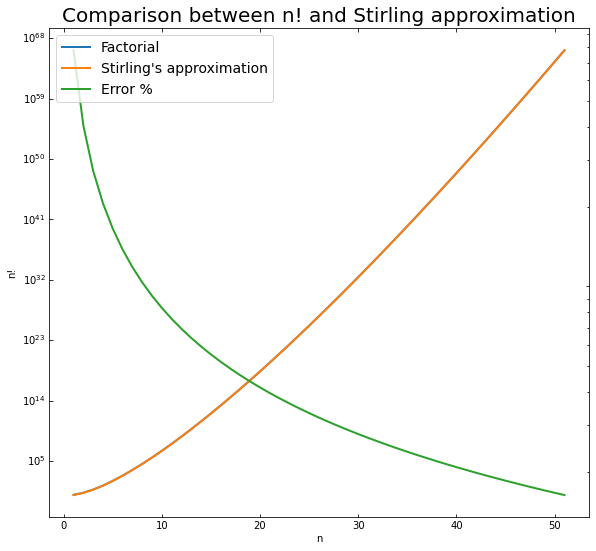

In [27]:
@widgets.interact(n=(2,100))
def plot_stirling_approx(n):
    n_fact = []
    n_fact_approx = []

    for i in range(1,n+1):
        n_fact.append(np.double(factorial(i)))
        n_fact_approx.append(np.double(np.sqrt(2*np.pi*i)*(i/np.e)**i))

    plt.figure(figsize=(12,9))
    host = host_subplot(111,axes_class=AA.Axes)
    plt.subplots_adjust(right=0.75)
    
    par1 = host.twinx()
    
    plt.title("Comparison between n! and Stirling approximation",fontsize=20)
    host.semilogy(range(1,n+1),n_fact,linewidth=2,label="Factorial")
    host.semilogy(range(1,n+1),n_fact_approx,linewidth=2,label="Stirling's approximation")
    
    host.set_xlabel("n",fontsize=16)
    host.set_ylabel("n!",fontsize=16)
        
    error = (np.asarray(n_fact)-np.asarray(n_fact_approx))/np.asarray(n_fact)
    
    p1, = par1.semilogy(range(1,n+1),error*100,linewidth=2,label="Error %")
    par1.set_ylabel("Error %",fontsize=16)
    par1.axis["right"]
    par1.axis["right"].label.set_color(p1.get_color())
    host.legend(fontsize=14)

    plt.show()

In [28]:
float_formatter = lambda x: "%.2f" % x
n=20
n_fact = [factorial(i) for i in range(n)]
n_fact_approx = [float_formatter(np.sqrt(2*np.pi*i)*(i/np.e)**i) for i in range(n)]
    
error = (np.asarray(n_fact)-np.asarray(n_fact_approx,dtype=np.float))/np.asarray(n_fact)
data = {"n":range(1,n+1),"n!":n_fact,"Stirling Approximation":n_fact_approx,"Error %":error*100}
df = pd.DataFrame(data=data,columns=["n","n!","Stirling Approximation","Error %"])
df.set_index("n")
print("Comparison between n! and stirling approximation")
print(df.to_string(index=False))

Comparison between n! and stirling approximation
  n                  n! Stirling Approximation     Error %
  1                   1                   0.00  100.000000
  2                   1                   0.92    8.000000
  3                   2                   1.92    4.000000
  4                   6                   5.84    2.666667
  5                  24                  23.51    2.041667
  6                 120                 118.02    1.650000
  7                 720                 710.08    1.377778
  8                5040                4980.40    1.182540
  9               40320               39902.40    1.035714
 10              362880              359536.87    0.921277
 11             3628800             3598695.62    0.829596
 12            39916800            39615625.05    0.754507
 13           479001600           475687486.47    0.691879
 14          6227020800          6187239475.19    0.638850
 15         87178291200         86661001740.60    0.593370
 16    

The following code plots a graph that should help to better understand the approximation done in the lectures. 

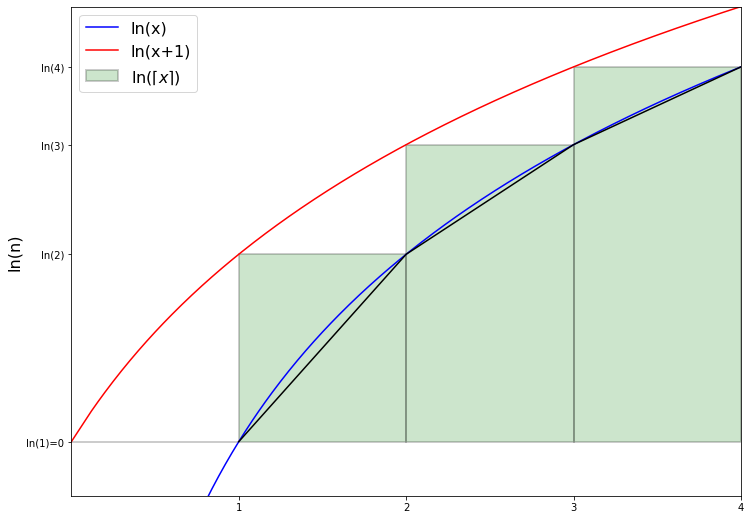

In [29]:
n = np.arange(0.1,5,0.01)
n_int = np.arange(1,5)
plt.figure(figsize=(12,9))

plt.plot(n,np.log(n),color='b',label="ln(x)")
n_new = n
n_new[0]=0
plt.plot(n_new,np.log(n+1),color='r',label='ln(x+1)')
plt.plot(n_int,np.log(n_int),color='k')
plt.bar(n_int-1, np.log(n_int),align="edge",width=1,color='g',alpha=0.2,linewidth=2,label=r"ln($ \lceil x  \rceil $)",fill=True,edgecolor="k")
plt.ylim(-0.2,np.log(5))
plt.xlim(0,4)
plt.ylabel("ln(n)",fontsize=16)
plt.xticks([1,2,3,4],["1","2","3","4"])
plt.yticks(np.log(n_int),["ln(1)=0","ln(2)","ln(3)","ln(4)"])
plt.legend(fontsize=16)
plt.show()